# Case Study: Walmart Sales Forcast
## With SQL, and Power BI

### Table of Contents
1. [Project Summary](#projectsummary)
    * 1.1 [Background](#projectbackground)
    * 1.2 [Dataset](#dataset)
2. [Objectives](#objectives)
    * 2.1 [Main Objective](#mainobjective)
3. [Preparing the data](#prepare)
    * 3.1 [Big Query](#bigquery)
4. [Processing the data](#process)
    * 4.1 [Datasets Used](#datasetsused)
5. [Analyzing the Data](#analyze)
    * 5.1 [Query 1: Size of Store and Sale](#query1)
    * 5.2 [Query 2: Which Date had the most sales](#query2)
    * 5.3 [Query 3: Sales leading up to holidays](#query3)
6. [Machine Learning Model: First Steps](#ML1)
    * 6.1 [Data Exploration and Merge](#datamergeexplore)
    * 6.2 [Plot of Weekly Sales](#plotWS)
    * 6.3 [Plot of Correlation of Features](#plotCF)
7. [Machine Learning Model: Model](#MLM)

## 1. Project Summary <a class="anchor" id="projectsummary"></a>

#### 1.1 Project Background <a class="anchor" id="projectbackground"></a>
Inspiration for this project came from [**Help Walmart Predict Manage Inventory**](https://www.kaggle.com/competitions/dsedelhi) contest held by Kaggle. This contest was shut on 30/May/2019 but I thought it would serve as an excellent opportunity to improve my skills in SQL and Power BI. The premise for this contest was to use historical sales data to forecast future sales of products. Sale forecasting has a strong influence on the performance of a company's success, therefore proper analysis of this data is crucial for the company's performance in the coming year. The accurate forecast will lead to better business decisions and help the retailer to take the necessary steps and measures to plan their yearly budgets and investments. 

For this Case Study I decided to ask the following questions:
* Whether the size of the store had an affect on sales?
* Which days had the highest sales?
* Conclude whether the weather has an essential impact on sales.
* Do the sales always rise near the holiday season for all the years?



#### 1.2 Dataset <a class="anchor" id="dataset"></a>
As the contest has been shut for 4 years, the dataset offered by Kaggle was no longer available to the public. After searching for a similar dataset I decide on using the  [**Walmart Recruiting Store Sales Forecasting**](https://www.kaggle.com/competitions/walmart-recruiting-store-sales-forecasting) dataset made available through Kaggle. This dataset contains four separate CSV files named features, stores, test, and train. All four csv files can be linked by the first column labelled 'Store'. Also, this dataset focuses on data collected between 2010-02-05 to 2013-12-30. The key dates in between that time frame are as follows:
* Super Bowl: 07-Feb-10, 06-Feb-11, 05-Feb-12, 03-Feb-13
* Labor Day: 06-Sep-10, 05-Sep-11, 07-Sep-12, 02-Sep-13
* Thanksgiving: 25-Nov-10, 24-Nov-11, 22-Nov-12, 28-Nov-13
* Christmas: 25-Dec-10, 25-Dec-11, 25-Dec-12, 25-Dec-13

## 2. Objectives <a class="anchor" id="objectives"></a>​
#### 2.1 Main Objective <a class="anchor" id="mainobjective"></a>
The main objective of this case study is to predict future sales for Walmart retail stores. As the datasets give us access to information such as weather, whether or not the sales day was a holiday, the price of fuel, and unemployment rates, we will also examine if any of these affect sales.

## 3. Prepare Section <a class="anchor" id="prepare"></a>
#### 3.1 BigQuery <a class="anchor" id="bigquery"></a>
I decided to use BigQuery as a platform to perform all SQL actions as cloud-based data warehouses such as BigQuery and Azure are in high demand. BigQuery is Google's fully managed, serverless data warehouse, it allows for quick analysis of a substantial amount of data. BigQuery also supports a standard version of SQL (ANSI SQL), another feature that makes BigQuery a great tool for this case study.

## 4. Processing the Data <a class="anchor" id="process"></a>
#### 4.1 Datasets Used <a class="anchor" id="datasetsused"></a>
As mentioned earlier the datasource contains 4 datasets:
​
* Features - containd: Store, Date, Temperature, Fuel Price, Markdown's 1 to 5, CPI, Unemployment, and IsHoliday columns
* Stores - contained: Store, Type, and Size columns
* Test - contained: Store, Dept, Date, and IsHoliday columns
* Train - contained: Store, Dept, Date, Weekly_Sales, and IsHoliday columns

## 5. Analyzing the Data <a class="anchor" id="analyze"></a>
#### 5.1 Query 1: Size of Store and Sales <a class="anchor" id="query1"></a>
The first SQL query I performed was to group the Stores by average weekly sales, type, and size. This was done to see if the size or type of the stores had an overall effect on how that store performed during the period of data collection. An Inner Join was used as we needed information from the Train and Stores tables. I also used the AVG function to average the weekly sales and label the column as AVG_Sales. Final the new table was grouped by Store, Size, and Type, then put in descending order based on the average weekly sales. 

In [263]:
''''
SELECT a.Store,
  AVG(a.Weekly_Sales) AS Avg_Sales,  
  b.Size,  
  b.Type  
FROM `walmart-forecast-case-study.forecast_data.train` AS a
INNER JOIN `walmart-forecast-case-study.forecast_data.stores` AS b ON a.Store = b.Store
GROUP BY a.Store, b.Size, b.Type
ORDER BY Avg_Sales
'''

"'\nSELECT a.Store,\n  AVG(a.Weekly_Sales) AS Avg_Sales,  \n  b.Size,  \n  b.Type  \nFROM `walmart-forecast-case-study.forecast_data.train` AS a\nINNER JOIN `walmart-forecast-case-study.forecast_data.stores` AS b ON a.Store = b.Store\nGROUP BY a.Store, b.Size, b.Type\nORDER BY Avg_Sales\n"

#### 5.2 Query 2: Which Date had the most sales <a class="anchor" id="query2"></a>
For the next query I used the MAX function to sort the data by highest weekly sales in a descending order. Bringing the highest grossing days to the top of my query results. I also decided to add the IsHoliday column to my query as this would help indicitate if sale rose during holiday dates. From my results I found that holiday dates and days surrounding the holidays had the high sales volume. The Christmas period and the day following Thanksgiving (Black Friday) saw some of the highest sales in this time-frame.

In [264]:
''''
SELECT Date,
  MAX(Weekly_Sales) AS Max_sales,
  IsHoliday
FROM `walmart-forecast-case-study.forecast_data.train`
GROUP BY Date, IsHoliday
ORDER BY Max_sales desc
'''

"'\nSELECT Date,\n  MAX(Weekly_Sales) AS Max_sales,\n  IsHoliday\nFROM `walmart-forecast-case-study.forecast_data.train`\nGROUP BY Date, IsHoliday\nORDER BY Max_sales desc\n"

#### 5.3 Query 3: Sales leading up to holidays <a class="anchor" id="query3"></a>
This SQL query was used to view the average sales each store had a week before and after a Holiday. The example below was for Christmas of 2010, but similar queries were written for Thanksgiving, Labor Day, and the Super Bowl. My aim was to track customer activity during the holiday dates to see if there was a spike in sales either before or after each holiday.

In [265]:
''''
SELECT Store,
  Date,
  AVG(Weekly_Sales) AS Avg_Sales
FROM `walmart-forecast-case-study.forecast_data.train`
WHERE Date >= '2010-12-18'
AND Date <= '2011-01-01'
GROUP BY Store, Date
'''

"'\nSELECT Store,\n  Date,\n  AVG(Weekly_Sales) AS Avg_Sales\nFROM `walmart-forecast-case-study.forecast_data.train`\nWHERE Date >= '2010-12-18'\nAND Date <= '2011-01-01'\nGROUP BY Store, Date\n"

## 6. Machine Learning Model: First Steps <a class="anchor" id="ML1"></a>
Here I will use some Machine Learning models to make some predictions. I will use the test dataset to create a submission file that will be used for a late submission in the competition.


In [266]:
# Imports
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

In [267]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv
/kaggle/input/walmart-recruiting-store-sales-forecasting/features.csv.zip
/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv.zip


In [268]:
# Reads CSV files
train = pd.read_csv('../input/walmart-recruiting-store-sales-forecasting/train.csv.zip')
test = pd.read_csv('../input/walmart-recruiting-store-sales-forecasting/test.csv.zip')
stores = pd.read_csv('../input/walmart-recruiting-store-sales-forecasting/stores.csv')
features = pd.read_csv('../input/walmart-recruiting-store-sales-forecasting/features.csv.zip')

#### 6.1 Data Exploration and Merge <a class="anchor" id="datamergeexplore"></a>
Below I will perform some further explorations to fully understand the data I am working with. After this step I will merge the datasets based on features i find appropriate. This new dataframe (df) will be the one used to train my models.

In [269]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [270]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [271]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [272]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [273]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [274]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [275]:
# Performs merge so all appropriate data is in one set df
df = train.merge(stores, on='Store')
feature_cols = ['Store', 'Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
df = df.merge(features[feature_cols], on=['Store', 'Date'])
df[['Store', 'Dept']] = df[['Store', 'Dept']].astype(str)
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year.astype(str)
df['Month'] = df['Date'].dt.month.astype(str)

df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,2010,2
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,211.096358,8.106,2010,2
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,211.096358,8.106,2010,2
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,211.096358,8.106,2010,2
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,211.096358,8.106,2010,2


In [276]:
# Performs merge step for test data, df_test
df_test = test.merge(stores, on='Store')
feature_cols = ['Store', 'Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
df_test = df_test.merge(features[feature_cols], on=['Store', 'Date'])
df_test[['Store', 'Dept']] = df_test[['Store', 'Dept']].astype(str)
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test['Year'] = df_test['Date'].dt.year.astype(str)
df_test['Month'] = df_test['Date'].dt.month.astype(str)

df_test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,1,2012-11-02,False,A,151315,55.32,3.386,223.462779,6.573,2012,11
1,1,2,2012-11-02,False,A,151315,55.32,3.386,223.462779,6.573,2012,11
2,1,3,2012-11-02,False,A,151315,55.32,3.386,223.462779,6.573,2012,11
3,1,4,2012-11-02,False,A,151315,55.32,3.386,223.462779,6.573,2012,11
4,1,5,2012-11-02,False,A,151315,55.32,3.386,223.462779,6.573,2012,11


In [277]:
df.describe()

,Date,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment
count,421570,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,2011-06-18 08:30:31.963375360,15981.258123,136727.915739,60.090059,3.361027,171.201947,7.960289
min,2010-02-05 00:00:00,-4988.940000,34875.000000,-2.060000,2.472000,126.064000,3.879000
25%,2010-10-08 00:00:00,2079.650000,93638.000000,46.680000,2.933000,132.022667,6.891000
50%,2011-06-17 00:00:00,7612.030000,140167.000000,62.090000,3.452000,182.318780,7.866000
75%,2012-02-24 00:00:00,20205.852500,202505.000000,74.280000,3.738000,212.416993,8.572000
max,2012-10-26 00:00:00,693099.360000,219622.000000,100.140000,4.468000,227.232807,14.313000
std,NaN,22711.183519,60980.583328,18.447931,0.458515,39.159276,1.863296


In [278]:
df.dtypes

Store                   object
Dept                    object
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Type                    object
Size                     int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Year                    object
Month                   object
dtype: object

In [279]:
# Checks for missing data
df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
dtype: int64

#### 6.2 Plot of Weekly Sales <a class="anchor" id="plotWS"></a>

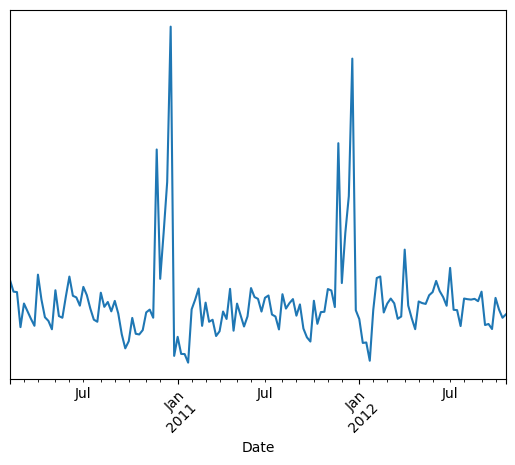

In [280]:
# Weekly sales plot
data = df.groupby("Date")["Weekly_Sales"].sum()
data.plot()
plt.xticks(rotation=45, rotation_mode="anchor", ha='right')
plt.yticks([])
plt.show()


Note: Clear spikes are seen around the christmas holidays.

#### 6.3 Plot of Correlation of Features <a class="anchor" id="plotCF"></a>

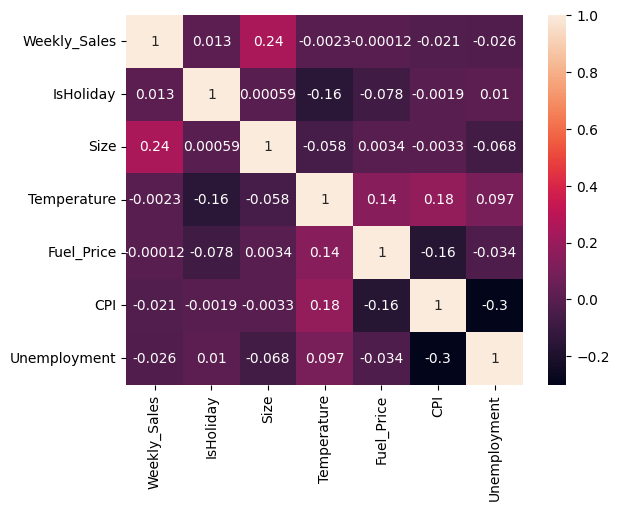

In [281]:
sns.heatmap(df.corr(numeric_only=True), annot = True)
plt.show()

## 7. Machine Learning Model: Model <a class="anchor" id="MLM"></a>

In [282]:
df.dtypes

Store                   object
Dept                    object
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Type                    object
Size                     int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Year                    object
Month                   object
dtype: object

In [283]:
# Preprocessor for numeric features, using StandardScaler
num_preprocessor = Pipeline(steps=[("scaler", StandardScaler())])

# Preprocessor for categorical features, using OneHotEncoder
cat_preprocessor = Pipeline(steps=[("onehot", OneHotEncoder(handle_unknown="ignore", drop='first'))])

# Stores categorical and numeric column names
cat_col = ['Store', 'Dept', 'Type', 'IsHoliday', 'Month'] # Categorical Columns
num_col = ['Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'] # Numeric Columns

# Essembles the preprocessor
preprocessor = ColumnTransformer(
    [
        ("categorical", cat_preprocessor, cat_col),
        ("numerical", num_preprocessor, num_col),
    ]
)

# Displays the preprocessor
preprocessor

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['Store', 'Dept', 'Type', 'IsHoliday',
                                  'Month']),
                                ('numerical',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Size', 'Temperature', 'Fuel_Price', 'CPI',
                                  'Unemployment'])])

In [284]:
# Creates X and y datasets
df_small = df.sample(10000, random_state=4)
X = df_small[cat_col+num_col]
y= df_small[['Date','Weekly_Sales']].set_index('Date')

# Creates train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 10)

In [285]:
# Display X_train head
X_train.head()

,Store,Dept,Type,IsHoliday,Month,Size,Temperature,Fuel_Price,CPI,Unemployment
267408,28,1,A,False,3,206302,59.57,3.054,126.606645,13.975
103090,11,20,A,False,7,207499,88.30,3.575,218.727522,7.567
150369,16,42,B,False,10,57197,45.00,2.762,190.862309,6.986
251092,26,25,A,False,4,152513,29.09,3.720,134.177774,7.818
297773,31,22,A,False,3,203750,54.69,3.459,213.764640,8.028


In [286]:
# Display y_train head
y_train.head()

,Weekly_Sales
Date,
2010-03-19,17976.97
2011-07-15,7878.89
2010-10-15,3713.18
2011-04-08,5395.38
2011-03-11,9266.32


In [287]:
# Imports models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xg

# Define Models 
lr = LinearRegression()
rf = RandomForestRegressor(random_state=4)
gb = GradientBoostingRegressor(random_state=4)
xg = xg.XGBRegressor(random_state=4)

# Model list
models = [lr, rf, gb, xg]

In [288]:
# Dictionary to store pipelines
pipelines = {}

# Loops over models and prints scores
for m in models:
    # Create a scikit-learn pipeline
    pipelines[m] = pipeline = make_pipeline(preprocessor, m)
    
    # Perform cross-validation on the training data
    cross_val_scores = cross_val_score(pipeline, X_train, y_train, cv=4, scoring='r2')
    
    # Prints values
    print(m)
    print(f"Cross-Validation Scores: {cross_val_scores}")
    print(f"Mean Cross-Validation Score: {np.mean(cross_val_scores)}\n")

LinearRegression()
Cross-Validation Scores: [0.66961242 0.6485083  0.64821515 0.66020733]
Mean Cross-Validation Score: 0.6566358006101268

RandomForestRegressor(random_state=4)
Cross-Validation Scores: [0.87741346 0.85872946 0.85746619 0.8521785 ]
Mean Cross-Validation Score: 0.8614469020169526

GradientBoostingRegressor(random_state=4)
Cross-Validation Scores: [0.69992986 0.68532465 0.69322097 0.68734761]
Mean Cross-Validation Score: 0.6914557723507222

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=Non